In [2]:
import zipfile
import os

def unzip_and_prepare(zip_file_path, extract_to='.'):
    """
    Unzips a file and returns a list of extracted file paths.

    :param zip_file_path: The path to the zip file.
    :param extract_to: The directory where the files will be extracted.
    :return: A list of paths to the extracted files.
    """
    extracted_files = []

    # Check if the zip file exists
    if not os.path.exists(zip_file_path):
        raise FileNotFoundError(f"The zip file {zip_file_path} does not exist.")

    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        extracted_files = zip_ref.namelist()

    # Return the list of extracted file paths
    extracted_file_paths = [os.path.join(extract_to, file) for file in extracted_files]

    return extracted_file_paths

# Example of reading CSV data from the extracted files
import pandas as pd

def load_csv(file_path):
    """
    Loads a CSV file into a pandas DataFrame.

    :param file_path: The path to the CSV file.
    :return: A pandas DataFrame containing the CSV data.
    """
    return pd.read_csv(file_path)


# Example usage
if __name__ == "__main__":
    zip_file = 'nlp-getting-started.zip'  # Specify the zip file path
    extract_dir = './extracted_data'  # Specify where to extract the files

    # Unzip and get list of extracted files
    extracted_files = unzip_and_prepare(zip_file, extract_dir)
    print("Extracted files:", extracted_files)

    # Load data (assuming one of the extracted files is a CSV)
    for file in extracted_files:
        if file.endswith('.csv'):
            df = load_csv(file)
            print(f"Data from {file}:")
            print(df.head())


Extracted files: ['./extracted_data/sample_submission.csv', './extracted_data/test.csv', './extracted_data/train.csv']
Data from ./extracted_data/sample_submission.csv:
   id  target
0   0       0
1   2       0
2   3       0
3   9       0
4  11       0
Data from ./extracted_data/test.csv:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan
Data from ./extracted_data/train.csv:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada 

In [7]:
test_data = load_csv(extracted_files[1])
train_data = load_csv(extracted_files[2])

In [10]:
# Analyze the training data
print("Training data info:")
print(train_data.info())
print("\nTraining data description:")
print(train_data.describe())
print("\nTraining data shape:", train_data.shape)
print("\nTraining data column names:", train_data.columns)
print("\nNumber of missing values per column:\n", train_data.isnull().sum())
print("\nValue counts for target variable 'target':\n", train_data['target'].value_counts())

# You can add more specific analysis based on your needs, for example:
# - Explore the distribution of text lengths
# - Analyze the frequency of words in the text
# - Identify potential outliers or anomalies
# - Check for class imbalance in the target variable
# - Visualize the data using histograms, scatter plots, etc.

# Example: Analyze text length
# train_data['text_length'] = train_data['text'].apply(len)
# print("\nDistribution of text lengths:\n", train_data['text_length'].describe())

# Example: Analyze word frequency
# from collections import Counter
# all_words = ' '.join(train_data['text']).split()
# word_counts = Counter(all_words)
# print("\nMost common words:\n", word_counts.most_common(10))


Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

Training data description:
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000

Training data shape: (7613, 5)

Training data column names: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

Number of missing values per column:
 id             0
keyword       61
location    2533
text         

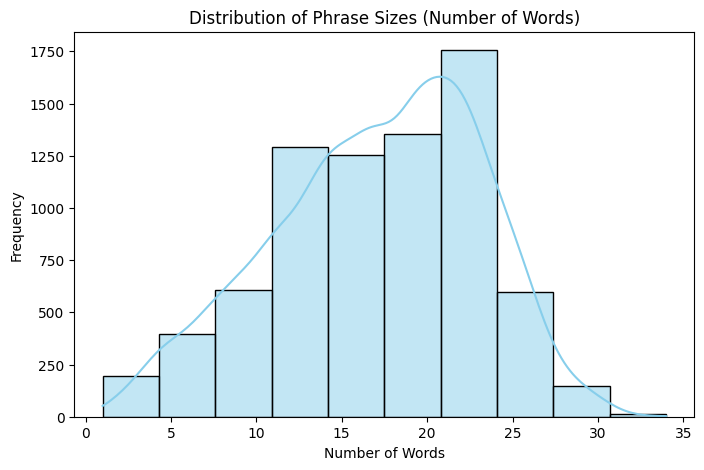

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to count words in each phrase
def count_words(phrase):
    # Use regex to split by spaces and remove punctuation
    words = re.findall(r'\b\w+\b', phrase)
    return len(words)

# Assume df is already defined with a 'text' column
df['phrase_size'] = df['text'].apply(count_words)

# Step 4: Plotting the distribution of phrase sizes
plt.figure(figsize=(8, 5))
sns.histplot(df['phrase_size'], bins=10, kde=True, color='skyblue')

# Adding labels and title
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Phrase Sizes (Number of Words)')

plt.show()


In [9]:
!pip install torch torchvision torchaudio

In [ ]:
# prompt: create me a pytorch model

import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(Model, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.rnn(embedded)
        hidden = hidden[-1, :, :]  # Take the last hidden state
        output = self.fc(hidden)
        return output

# Example usage:
vocab_size = 10000  # Replace with your actual vocabulary size
embedding_dim = 128
hidden_dim = 256
output_dim = 2  # Assuming binary classification (e.g., disaster/not disaster)

model = Model(vocab_size, embedding_dim, hidden_dim, output_dim)
print(model)
